# Project Description Unsupervised Learning

## Open and display the image “dog.jpeg”. The image has to be converted in to numpy array, so that it can be used in further processing. 
- The major challenge is to identify the dominant color in the image.

## Use K-means clustering for image segmentation, which will include the following steps:
- Find out the dimensions of the image and convert it in to a two-dimensional array.
- Use k-means clustering with k set to 3 and cluster the image.
- Predict the cluster label of every pixel in the image and plot it back as an image.
- Find out the three dominant color in the image. [Hint: The cluster centers should correspond to three dominant colors]

In [1]:
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

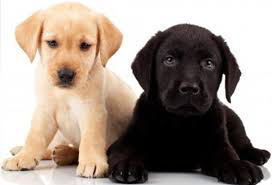

In [2]:
# Load the image using PIL
image = Image.open("dogs.jpeg")
image = image.convert('RGB')  # Ensure the image is in RGB format
image

In [3]:
# Convert the image to a numpy array
image_np = np.array(image)
image_np

array([[[240, 240, 240],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[240, 240, 240],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[240, 240, 240],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[252, 248, 249],
        [254, 250, 251],
        [255, 253, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[247, 245, 246],
        [250, 248, 249],
        [255, 253, 254],
        ...,
        [255, 255, 255],
        [252, 252, 252],
        [244, 244, 244]],

       [[253, 251, 254],
        [253, 251, 254],
        [253, 251, 252],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

In [4]:
image_np.shape

(185, 272, 3)

In [5]:
image_np.size

150960

Let's break down each line of the code:

### 1. `image = Image.open("dogs.jpeg")`
- **Explanation:** This line opens an image file named `dogs.jpeg` using the Python Imaging Library (PIL), which is available through the `Pillow` package. The `Image.open()` function returns an `Image` object that you can manipulate.

### 2. `image = image.convert('RGB')`
- **Explanation:** This line ensures that the image is in RGB format. Some image files might have different color modes (like grayscale or RGBA), so converting to `'RGB'` makes sure the image has three color channels: Red, Green, and Blue. The result is a more consistent format for image processing.

### 3. `image_np = np.array(image)`
- **Explanation:** Here, the image is converted into a NumPy array using `np.array(image)`. A NumPy array is a multi-dimensional array that is commonly used in image processing, scientific computing, and data analysis. This conversion allows for easier manipulation and analysis of the image data.

### 4. `image_np`
- **Explanation:** This line outputs the NumPy array representation of the image. It contains pixel values arranged in a 3D structure, where:
  - The first two dimensions represent the height and width of the image (rows and columns of pixels).
  - The third dimension contains three values representing the RGB channels for each pixel.

### Information About the Array:
- **Shape:** The array has a shape `(height, width, 3)`. The first two dimensions represent the number of pixels in the vertical and horizontal directions, respectively. The last dimension (3) represents the RGB color channels.
- **Size:** The size is the total number of elements (pixels) in the array, which is the product of the dimensions.
- **Data Type:** The elements in the array are typically integers between 0 and 255, representing the intensity of each color channel.

For example:
- If the image is 600x800 pixels, the shape would be `(600, 800, 3)`.
- If the image has 480,000 pixels, the array size would be 1,440,000 (600 * 800 * 3).


### Additional Considerations:
1. **Data Type of the Array:**
   - Typically, the NumPy array created from an image has a data type of `uint8` (unsigned 8-bit integer), meaning each pixel value ranges from 0 to 255 for each RGB channel. This range represents the intensity of the color, where 0 is the darkest (no light) and 255 is the brightest.

2. **Pixel Value Access:**
   - You can access specific pixel values using indexing. For example, `image_np[100, 150]` would give you the RGB values of the pixel at row 100, column 150. The result might look like `[34, 67, 128]` where 34 is the red value, 67 is green, and 128 is blue.

3. **Image Display:**
   - If you want to display the image from the NumPy array, you can use the following code:
     ```python
     from matplotlib import pyplot as plt
     plt.imshow(image_np)
     plt.axis('off')  # Hide axis labels
     plt.show()
     ```

4. **Potential Use Cases:**
   - Converting an image to a NumPy array is often done for tasks like image filtering, transformation, or using the data as input for machine learning models.

With this, you’ve covered both the core functionality and some practical extensions of the operations!

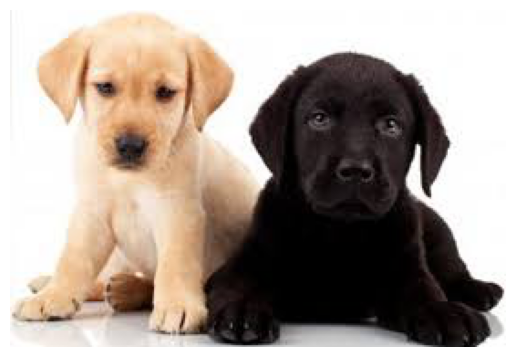

In [6]:
from matplotlib import pyplot as plt
plt.imshow(image_np)
plt.axis('off')  # Hide axis labels
plt.show()


<font size = 4.5>**Shape of the image (height, width, 3)**
    <br><br>- Height(185): The number of rows of pixels in the image. It measures **how tall** the image is.
    <br><br>- Width(272): The number of columns of pixels in the image. It measures **how wide** the image is.
    <br><br>- 3: Represents the three color channels (Red, Green, Blue).

In [7]:
# Reshape the image to a 2D array of pixels
pixel_values = image_np.reshape((-1, 3))
print(pixel_values)

[[240 240 240]
 [255 255 255]
 [255 255 255]
 ...
 [254 254 254]
 [254 254 254]
 [254 254 254]]


## Let’s break down the line of code and its functionality:

### Code Explanation:
```python
pixel_values = image_np.reshape((-1, 3))
```

### 1. **`image_np.reshape((-1, 3))`:**

- **Explanation:** The `reshape()` function in NumPy is used to change the shape of an array without altering its data. The `-1` parameter is a special placeholder in the `reshape` function that tells NumPy to automatically determine the size of that dimension based on the original size of the array. 
- **Functionality in this Context:**
  - `image_np` originally has a shape of `(height, width, 3)`, representing the height, width, and 3 RGB channels.
  - By using `.reshape((-1, 3))`, the array is flattened into a 2D array where each row represents a single pixel and each column represents the RGB values for that pixel. This results in a shape of `(number_of_pixels, 3)`, where:
    - `number_of_pixels = height * width`.
  - For example, if the original image is 600x800 pixels, the reshaped array would have a shape of `(480,000, 3)`.

### 2. **`pixel_values`:**

- **Explanation:** The variable `pixel_values` stores the reshaped array. It contains each pixel’s RGB values as a separate row in the format `[R, G, B]`.
- **Practical Use:** This 2D format is useful in scenarios like clustering, pixel-level classification, or applying transformations based on pixel values.

### Summary:
- The original 3D image array `(height, width, 3)` is reshaped into a 2D array `(number_of_pixels, 3)` where each row corresponds to the RGB values of one pixel.
- This flattened structure is often used for more straightforward analysis and processing, as it allows you to work with pixels as independent data points.

This covers everything the line does!

In [8]:
pixel_values.shape

(50320, 3)

## Let's go through each line and then discuss how to determine the number of clusters.

### Code Explanation:
```python
# Define the number of clusters (K)
k = 20
```
1. **`k = 20`:**
   - **Explanation:** This line defines the number of clusters (`k`) for the KMeans algorithm. Clusters are groups of similar data points (in this case, similar pixels). The goal is to segment the image into `k` different color clusters.
   - **Practical Use:** Each cluster represents a dominant color in the image. Setting `k = 20` means the algorithm will try to find 20 dominant colors.

```python
# Apply KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
```
2. **`kmeans = KMeans(n_clusters=k, random_state=42)`:**
   - **Explanation:** This line initializes the KMeans clustering algorithm.
   - **Parameters:**
     - `n_clusters=k`: Specifies the number of clusters to find, which is set to `k = 20`.
     - `random_state=42`: Sets a seed for the random number generator, ensuring reproducible results. Using a fixed seed like 42 is common when you want consistent output each time you run the code.
   - **What is KMeans?**
     - KMeans is a popular clustering algorithm used to partition data into `k` clusters based on their similarity (Euclidean distance). In the context of an image, similar pixel colors are grouped together.

```python
labels = kmeans.fit_predict(pixel_values)
```
3. **`labels = kmeans.fit_predict(pixel_values)`:**
   - **Explanation:** This line applies the KMeans algorithm to the image data and assigns each pixel to one of the `k` clusters.
   - **`fit_predict(pixel_values)`:**
     - The `fit_predict()` method first fits the KMeans model on the data (`pixel_values`) and then predicts which cluster each pixel belongs to.
   - **`labels`:** The output is an array where each element corresponds to a pixel and contains the cluster label (from 0 to `k-1`) to which that pixel is assigned.
   - **Practical Use:** You can use these labels to recolor the image using the dominant colors of each cluster.

### 2. How to Decide the Number of Clusters (`k`)?
Deciding the optimal number of clusters is crucial for getting meaningful results. Here are some common approaches:

1. **Elbow Method:**
   - Plot the sum of squared distances (inertia) from each point to its assigned cluster center as a function of `k`.
   - Look for an "elbow" in the plot where the rate of decrease slows down. The value of `k` at the elbow point is often a good choice.

2. **Silhouette Score:**
   - The silhouette score measures how similar a point is to its own cluster compared to other clusters. The score ranges from -1 to 1, with a higher score indicating better-defined clusters.
   - You can try different values for `k` and choose the one that maximizes the silhouette score.

3. **Domain Knowledge:**
   - Sometimes, you have prior knowledge about the number of dominant colors or clusters you expect in the image. For example, if you know the image contains only a few distinct color regions, you might set `k` based on that.

4. **Visualization and Manual Tuning:**
   - Start with a rough estimate (e.g., `k = 10` or `k = 20`) and visually inspect the clustered image to determine if the segmentation looks satisfactory.

In summary, while `k = 20` is a starting point, you can experiment with different values of `k` and use the methods mentioned above to find the optimal number for your specific image.

Here is the code for both the Elbow Method and the Silhouette Score for determining the optimal number of clusters:

### 1. **Elbow Method Code:**

The Elbow Method helps determine the optimal `k` by plotting the sum of squared distances (inertia) for different values of `k` and looking for the "elbow" point.

```python
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define the range of clusters to test
k_values = range(1, 15)  # Test different values of k from 1 to 15
inertia_values = []

# Calculate inertia (sum of squared distances) for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixel_values)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()
```

### Explanation:
- `inertia_values.append(kmeans.inertia_)`: The inertia is the sum of squared distances of samples to their nearest cluster center. The elbow point in the plot indicates the optimal number of clusters.

### 2. **Silhouette Score Code:**

The Silhouette Score measures how close each point in one cluster is to the points in neighboring clusters. A higher silhouette score indicates better-defined clusters.

```python
from sklearn.metrics import silhouette_score

# Define the range of clusters to test
k_values = range(2, 15)  # Test different values of k from 2 to 15 (silhouette score requires at least 2 clusters)
silhouette_scores = []

# Calculate silhouette scores for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pixel_values)
    score = silhouette_score(pixel_values, labels)
    silhouette_scores.append(score)

# Plot the Silhouette Score graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()
```

### Explanation:
- `silhouette_score(pixel_values, labels)`: This calculates the silhouette score for the clustering. The higher the score, the better the clusters are separated.
- The optimal `k` is the one that maximizes the silhouette score.

### How to Use These Methods:
- **Elbow Method:** Look for the "elbow" or point of inflection in the inertia plot where the rate of decrease slows down.
- **Silhouette Score:** Look for the highest silhouette score in the plot.

These methods provide complementary insights and can guide you in selecting the best `k` for your clustering.

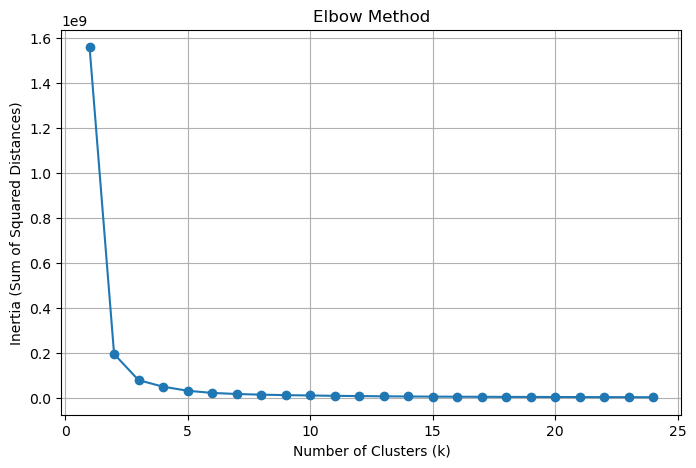

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define the range of clusters to test
k_values = range(1, 25)  # Test different values of k from 1 to 25
inertia_values = []

# Calculate inertia (sum of squared distances) for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=55)
    kmeans.fit(pixel_values)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()


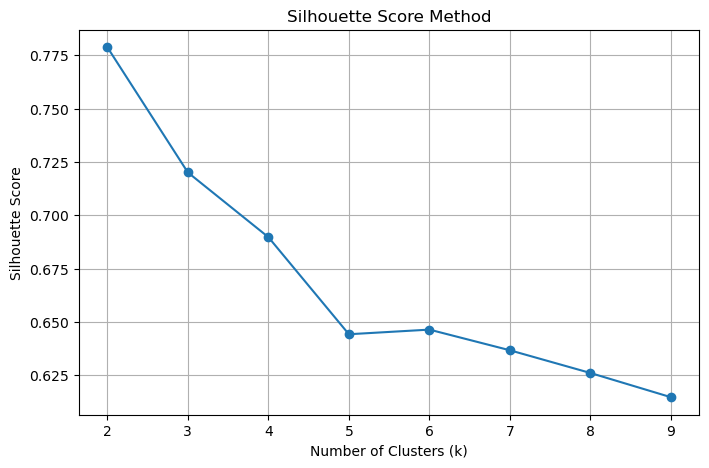

In [10]:
from sklearn.metrics import silhouette_score

# Define the range of clusters to test
k_values = range(2, 10)  # Test different values of k from 2 to 10 (silhouette score requires at least 2 clusters)
silhouette_scores = []

# Calculate silhouette scores for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=55)
    labels = kmeans.fit_predict(pixel_values)
    score = silhouette_score(pixel_values, labels)
    silhouette_scores.append(score)

# Plot the Silhouette Score graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


## Number of Clusters = 2

In [16]:
# Define the number of clusters (K)
k = 2
# Apply KMeans
kmeans = KMeans(n_clusters=k, random_state=55)
labels = kmeans.fit_predict(pixel_values)

In [17]:
len(labels)

50320

In [18]:
centers = np.uint8(kmeans.cluster_centers_)

# Map the labels to the center points (colors)
segmented_image = centers[labels.flatten()]

In [20]:
# Reshape back to the original image dimensions
segmented_image = segmented_image.reshape(image_np.shape)

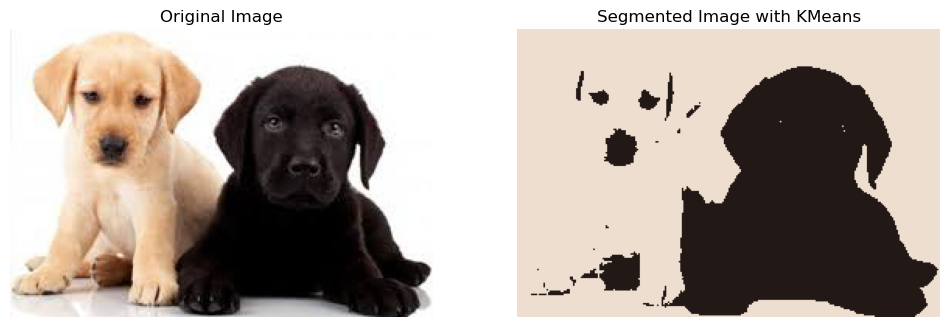

In [21]:
# Display the original and segmented images using matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Original image
ax1.imshow(image)
ax1.set_title('Original Image')
ax1.axis('off')

# Segmented image
ax2.imshow(segmented_image)
ax2.set_title('Segmented Image with KMeans')
ax2.axis('off')

plt.show()

## Number of Clusters = 5

In [11]:
# Define the number of clusters (K)
k = 5
# Apply KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(pixel_values)

In [12]:
len(labels)

50320

In [13]:
centers = np.uint8(kmeans.cluster_centers_)

# Map the labels to the center points (colors)
segmented_image = centers[labels.flatten()]

In [14]:
# Reshape back to the original image dimensions
segmented_image = segmented_image.reshape(image_np.shape)

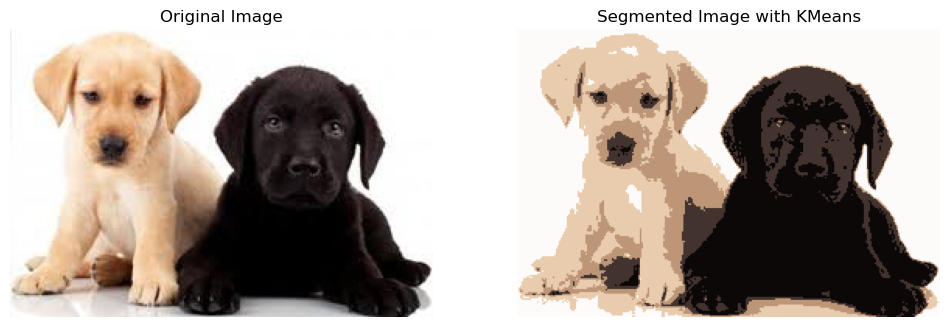

In [15]:
# Display the original and segmented images using matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Original image
ax1.imshow(image)
ax1.set_title('Original Image')
ax1.axis('off')

# Segmented image
ax2.imshow(segmented_image)
ax2.set_title('Segmented Image with KMeans')
ax2.axis('off')

plt.show()


https://chatgpt.com/c/cfc64ae7-c470-4dcf-b13c-9cd300bd1126  -- AJ